The next supervised model we'll dive in is Kernelized support vector machines. Often referred to as SVMs, are an extension that allows for more complex models that aren't defined simply by hyperplanes in the input space. Like all other model, it can be use in both classification and regression task.

### Types of SVMs Algorithm

- Linear SVM: When the data is perfectly linearly separable only then we can use Linear SVM. Perfectly linearly separable means that the data points can be classified into 2 classes by using a single straight line(if 2D).
- Non-Linear SVM: When the data is not linearly separable then we can use Non-Linear SVM, which means when the data points cannot be separated into 2 classes by using a straight line (if 2D) then we use some advanced techniques like kernel tricks to classify them. In most real-world applications we do not find linearly separable datapoints hence we use kernel trick to solve them.

### Important Terms

- Support Vectors: These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.
- Margin: it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin. I will talk more about these two in the later section.

<img src="https://editor.analyticsvidhya.com/uploads/567891.png" alt="Alternative text" />

## How Does Support Vector Machine Work?

Let’s understand the working of SVM using an example. Suppose we have a dataset that has two classes (green and blue). We want to classify that the new data point as either blue or green.

<img src="https://editor.analyticsvidhya.com/uploads/467902.png" alt="Sample data" />

To classify these points, we can have many decision boundaries, but the question is which is the best and how do we find it? NOTE: Since we are plotting the data points in a 2-dimensional graph we call this decision boundary a straight line but if we have more dimensions, we call this decision boundary a “hyperplane”

<img src="https://editor.analyticsvidhya.com/uploads/492453.png" alt="Finding best plane" />

The best hyperplane is that plane that has the maximum distance from both the classes, and this is the main aim of SVM. This is done by finding different hyperplanes which classify the labels in the best way then it will choose the one which is farthest from the data points or the one which has a maximum margin.

<img src="https://editor.analyticsvidhya.com/uploads/729834.png" alt="Best plane split" />

During training, the SVM learns how important each of the training data points is to represent the decision boundary between the two classes. Typically only a subset of the training points matter for defining the decision boundary: the ones that lie on the border between the classes.

The distance between data points is measured by the Gaussian kernel:

$$k_{rbf}(x_1, x_2) = exp(-\gamma||x_1 - x_2||^2)$$

where $x_1$ and $x_2$ are data points, $||x_1 - x_2||$ is the Euclidean distance between the two points, and $\gamma$ is a parameter that controls the width of the Gaussian kernel.

Text(0, 0.5, 'Feature 1')

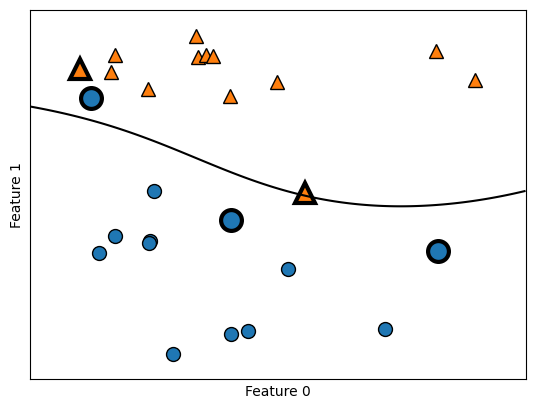

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import mglearn as mgl

X, y = mgl.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mgl.plots.plot_2d_separator(svm, X, eps=.5)
mgl.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mgl.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

So as we can see, the SVM model above returns a very smooth and non-linear decision boundary. This is achieved by the *kernel trick*, which transforms the input space into a higher dimensional space, where it becomes possible to separate the data using a linear decision boundary.

## Tuning SVM parameters

The gamma parameter is a hyperparameter that we need to tune for the RBF kernel. It controls the width of the Gaussian kernel. A small gamma means a large variance, and a large gamma means a small variance. The C parameter is a regularization parameter, and it controls the tradeoff between a smooth decision boundary and classifying the training points correctly.

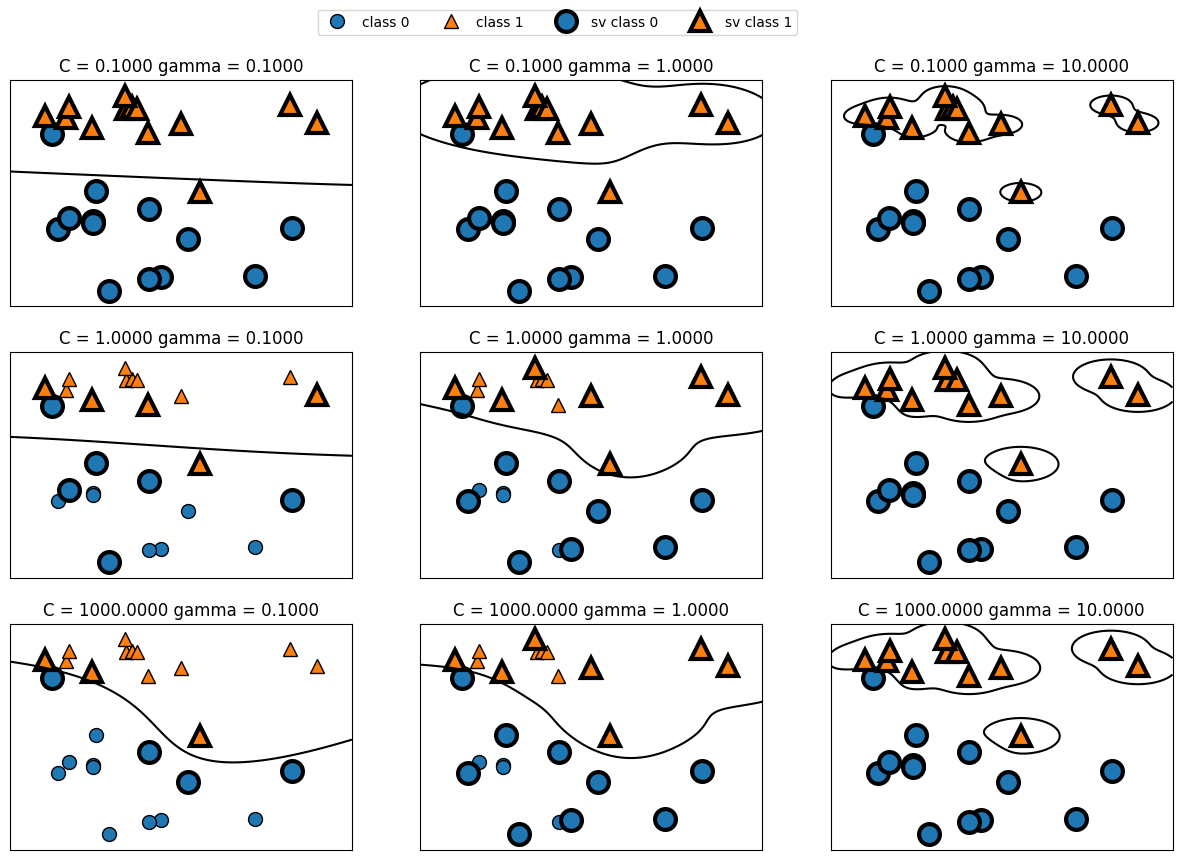

In [2]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mgl.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4
                     , loc=(.9, 1.2))

From left ro right, the value of gamma is increasing, and the decision boundary becomes more irregular. The value of C is increasing, and the decision boundary becomes more irregular.

Let's apply RBF kernel SVM to the dataset and see how it performs. Set the value of C to 1 and gamma to 1/n_features.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [7]:
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Overall, the SVM model is very powerful, very flexible, as the kernel trick allows for the separation of data that is not linearly separable. Let's take a look at the graph of the decision boundary and the accuracy of the model.

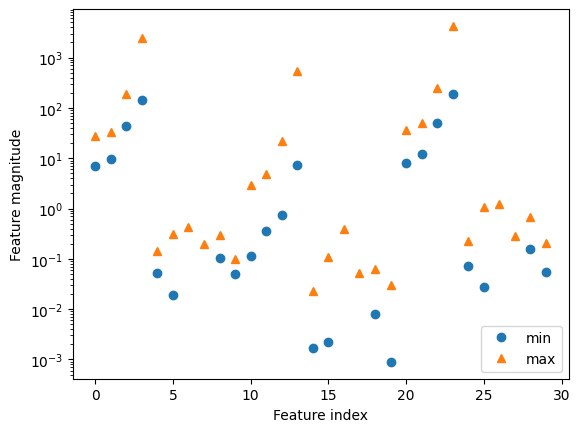

In [8]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

From this plot we can determine that features in the Breast Cancer dataset are of completely different orders of magnitude. This can be somewhat of a problem for other models (like linear models), but it has devastating effects for the kernel SVM.

#### Kernels

The data we have looked at so far is relatively easy to classify because it is clearly separated. Such data can almost never be found in the real world. Also, we are oftentimes working in higher dimensions with many features. This makes things more complicated.

![Alt text](image.png)

As you can see, the data is not linearly separable, real world data is often like this. This is where the kernel trick comes in. The kernel trick is a mathematical technique that implicitly maps instances into a very high-dimensional space, allowing it to fit the non-linear relationships. The kernel trick is a way to avoid the expensive computation of the coordinates of the data in a higher-dimensional space. It is a way to compute the distance between two points in a higher-dimensional space without actually transforming the data to a higher-dimensional space.

#### Soft Margin

Sometimes, we will encounter statistical outliers in our data. It would be very easy to draw a hyperplane that separates the data into the classes, if it wasn’t for these outliers.

![Alt text](image-1.png)

In the figure above, you can see such a data set. We can see that almost all of the orange triangles are in the top first third, whereas almost all the blue dots are in the bottom two thirds. The problem here is with the outliers.

Now instead of using a kernel or a polynomial function to solve this problem, we can define a so-called soft margin. With this, we allow for conscious misclassification of outliers in order to create a more accurate model. Caring too much about these outliers would again mean overfitting the model.

## Preprocessing the data for SVMs

There's various way to preprocess the data for SVMs. The most common way is to scale the data to have a mean of 0 and a variance of 1. This can be done using the `StandardScaler` from `sklearn.preprocessing`. But for now we will do it manually.

In [9]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [10]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [11]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


Well, scaling the data is very important for SVMs, as the model is very sensitive to the scale of the features.

From here, we can try to tune the hyperparameters of the model to see if we can improve the accuracy of the model.

In [12]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


The accuracy of the model is 0.95, which got decreased from 0.97. This is because the model is overfitting the training data (C is too large).

## Pros and Cons of SVMs

Kernelized support vector machines are powerful models and perform well on a variety of datasets. An SVM is a good model to use when the number of features is large compared to the number of samples. They work well on low-dimensional and high-dimensional data, and they can work well on both linear and non-linear data.

Another downside of SVMs is that they are sensitive to the choice of the kernel and the kernel parameters. This means that the model is not very interpretable, and it can be hard to understand why a particular prediction was made.

Data scaling is also very important for SVMs, as the model is very sensitive to the scale of the features. This is because the model tries to maximize the margin between the support vectors, and if the features are of different scales, the margin will be influenced by the scale of the features.

Some important parameters to tune are the choice of the kernel, the kernel parameters, and C, the regularization parameter.